In [20]:
using Distributions, Images, Color, FixedPointNumbers, ImageView, Gadfly;

In [2]:
img = imread("../equ.jpg");

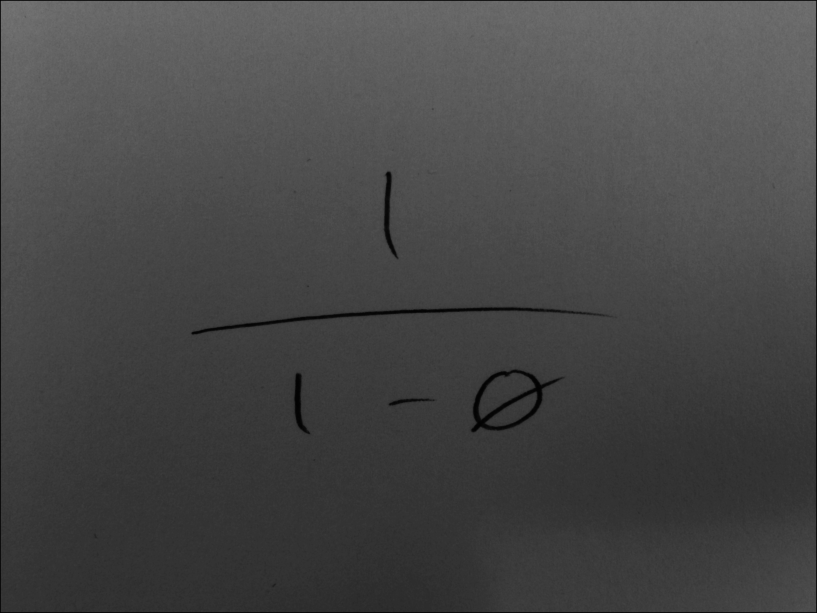

In [3]:
imgbw = convert(Image{Gray}, img)  

In [4]:
show(img)

RGB Image with:
  data: 3264x2448 Array{RGB{UfixedBase{Uint8,8}},2}
  properties:
    IMcs: sRGB
    spatialorder:  x y
    pixelspacing:  1 1

In [5]:
# Convert an image to a binary matrix based on a threshold value ∈ [0,3].
function imagetobinarymatrix(img, threshold)
    result = Array(Int, width(img), height(img))
    for x = 1:width(img)
        for y = 1:height(img)
            if ((img[x,y].r + img[x,y].g + img[x,y].b) < threshold)
                result[x,y] = 0
            else
                result[x,y] = 1
            end
        end
    end
    result
end

imagetobinarymatrix (generic function with 1 method)

In [6]:
# Convert an image to a binary matrix based on a threshold value ∈ [0,3].
function imagetobinarymatrix2(img, threshold)
    result = Array(Int, width(img), height(img))
    for y = 1:height(img), x = 1:width(img) 
        if ((img[x,y].r + img[x,y].g + img[x,y].b) < threshold)
            result[x,y] = 0
        else
            result[x,y] = 1
        end
    end
    result
end

imagetobinarymatrix2 (generic function with 1 method)

In [7]:
bm = imagetobinarymatrix2(img, 1)

3264x2448 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

In [8]:
@elapsed imagetobinarymatrix(img, 1)

0.26446936

In [9]:
@elapsed imagetobinarymatrix2(img, 1)

0.132643636

In [10]:
# Convert a binary array into a gray image. 
function binarymatrixtoimage(data)
    width = size(data, 1)
    height = size(data, 2)
    result = Array(RGB, width, height)
    for x = 1:width
        for y = 1:height
            if (data[x,y] == 1)
                result[x,y] = RGB(1,1,1)
            else
                result[x,y] = RGB(0,0,0)
            end
        end
    end
    grayim(result)
end

binarymatrixtoimage (generic function with 1 method)

In [11]:
# Convert a binary array into a gray image. 
function binarymatrixtoimage2(data)
    width = size(data, 1)
    height = size(data, 2)
    result = Array(RGB, width, height)
    for y = 1:height, x = 1:width
        if (data[x,y] == 1)
            result[x,y] = RGB(1,1,1)
        else
            result[x,y] = RGB(0,0,0)
        end
    end
    grayim(result)
end

binarymatrixtoimage2 (generic function with 1 method)

In [12]:
@elapsed binarymatrixtoimage(bm)

0.395422772

In [13]:
@elapsed binarymatrixtoimage2(bm)

0.22691605

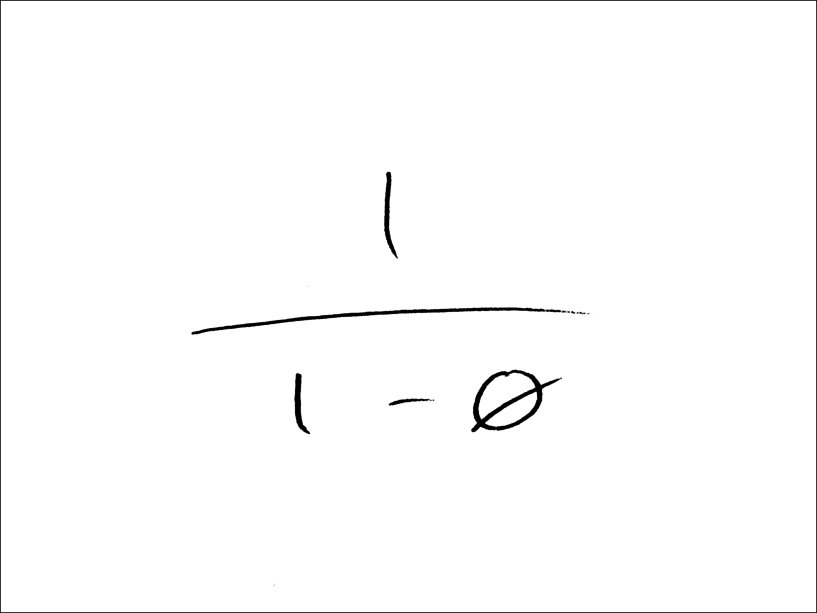

In [14]:
binarymatrixtoimage2(bm)

In [15]:
function rowdetect(data)
    width = size(data, 1)
    height = size(data, 2)
    result = Array(Int, width, height)
    line = false
    for y = 1:height
        if (mean(data[:, y]) == 1 && line == false)
            result[:, y] = 0 
            line = true
        elseif (mean(data[:, y]) < 1)
            result[:, y] = data[:, y] 
            line = false
        else
            result[:, y] = 1
        end
    end
    result
end

rowdetect (generic function with 1 method)

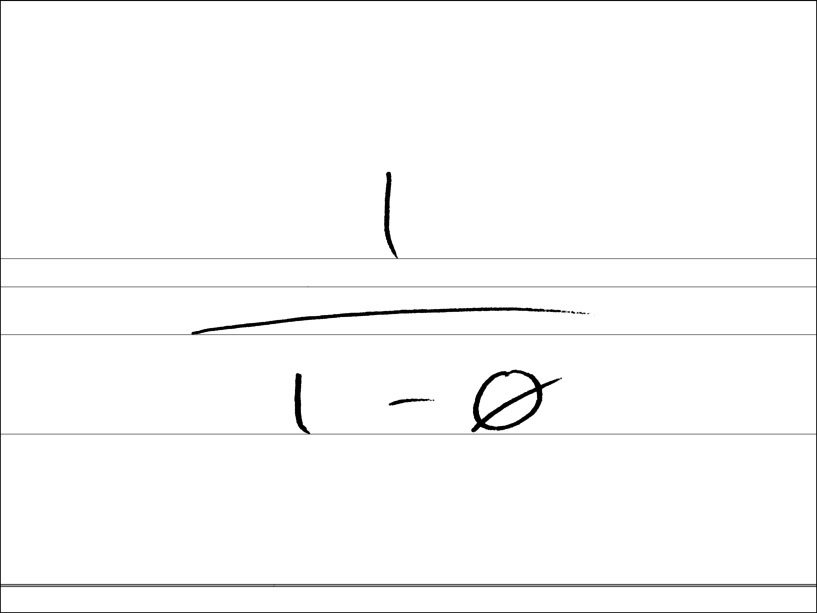

In [16]:
bl = binarymatrixtoimage(rowdetect(bm))

In [45]:
dat = reshape(map(x -> float64(x.val), data(imgbw)), size(imgbw, 1) * size(imgbw, 2));

In [52]:
length(dat)

7990272

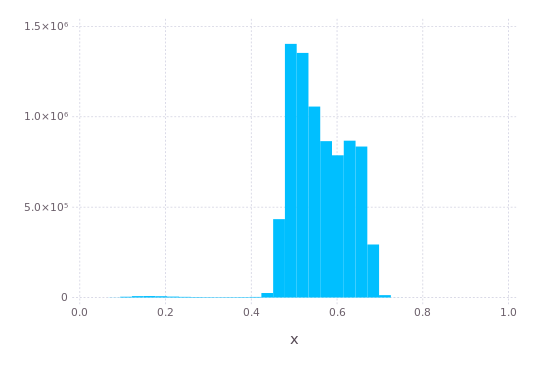

In [59]:
plot(x = dat, Geom.histogram(bincount = 30))

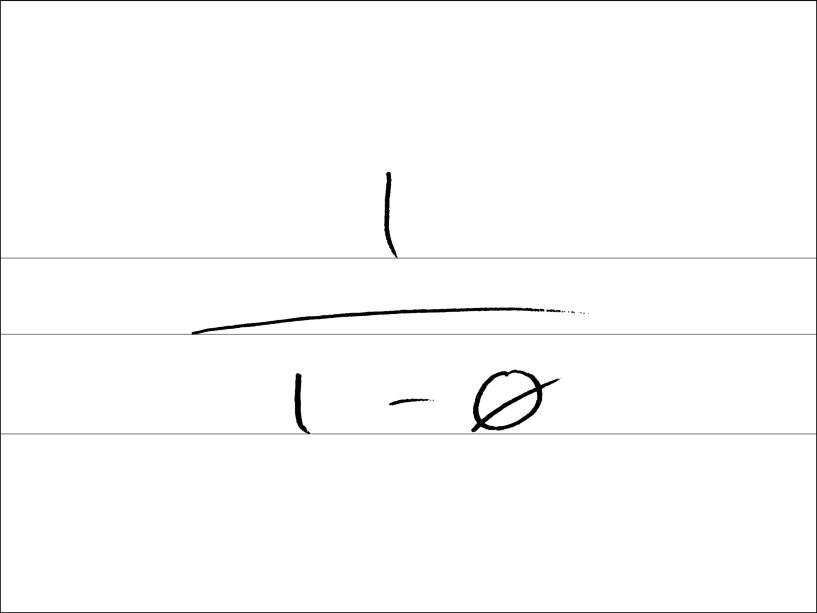

In [58]:
binarymatrixtoimage2(rowdetect(imagetobinarymatrix2(img, .9)))